In [1]:
import numpy as np
import pandas as pd

In [2]:
data_path = "/content/data.csv"

Представлены данные по поступлению денежных средств от
клиентов компании N за покупку ее услуг.

● client_id - ID клиента;

● sum – сумма денежных средств;

● status – статус оплаты;

● sale – менеджер, заключивший сделку;

● new/current – статус сделки;

● document – наличие оригинала подписанного договора с клиентом;

● receiving_date – дата получения оригинала договора.

In [3]:
df = pd.read_csv(data_path)
df = df.drop('Unnamed: 5', axis=1)
df

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,"11 693,70",ВНУТРЕННИЙ,-,-,-,-
2,14.0,"5 452,70",ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21
3,15.0,"13 991,70",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21
4,16.0,"719,7",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21
...,...,...,...,...,...,...,...
725,285.0,"4 328,70",ОПЛАЧЕНО,Васильев,текущая,оригинал,15.11.21
726,360.0,"3 096,20",ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,"3 096,20",ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,"4 403,70",ОПЛАЧЕНО,Михайлов,новая,оригинал,08.11.21


In [4]:
def process_value(value): # Смена формата на столбцах sum и receiving_date с object на float и datetime
    if not pd.isna(value) and isinstance(value, str):
        cleaned_value = value.replace('\xa0', '').replace(',', '.')
        return float(cleaned_value)
    return value
df['sum'] = df['sum'].apply(process_value)
df['receiving_date'] = pd.to_datetime(df['receiving_date'], format='%d.%m.%y', errors='coerce')

In [5]:
# Разбиение датасета на несколько частей с мая 2021 до октября 2021
dataframes = []
temp_df = pd.DataFrame(columns=df.columns)

for index, row in df.iterrows():
    if pd.isna(row['client_id']):
        if not temp_df.empty:
            dataframes.append(temp_df)
        temp_df = pd.DataFrame(columns=df.columns)
    else:
         temp_df = pd.concat([temp_df, row.to_frame().T], ignore_index=True)

dataframes.append(temp_df)
months = ["май 2021","июнь 2021", "июль 2021", "август 2021", "сентябрь 2021", "октябрь 2021"]
for index, df_part in enumerate(dataframes):
    print(f"Датафрейм {months[index]}:")
    print(df_part.head())
    print("\n")

Датафрейм май 2021:
  client_id      sum      status     sale new/current  document receiving_date
0       6.0  11693.7  ВНУТРЕННИЙ        -           -         -            NaT
1      14.0   5452.7    ОПЛАЧЕНО  Петрова       новая  оригинал     2021-07-26
2      15.0  13991.7    ОПЛАЧЕНО   Иванов     текущая  оригинал     2021-06-08
3      16.0    719.7    ОПЛАЧЕНО   Иванов     текущая  оригинал     2021-06-08
4      18.0   4253.7    ОПЛАЧЕНО   Иванов     текущая  оригинал     2021-07-07


Датафрейм июнь 2021:
  client_id      sum    status       sale new/current  document receiving_date
0     316.0  35653.7  ОПЛАЧЕНО    Петрова       новая  оригинал     2021-08-09
1      15.0  13518.7  ОПЛАЧЕНО     Иванов     текущая  оригинал     2021-07-09
2      16.0    985.3  ОПЛАЧЕНО     Иванов     текущая  оригинал     2021-07-09
3      18.0   2996.7  ОПЛАЧЕНО     Иванов     текущая  оригинал     2021-09-09
4      21.0   4233.7  ОПЛАЧЕНО  Кузнецова     текущая  оригинал     2021-09-17


Датафре

In [6]:
def summary(df): #Общий анализ
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['missing#'] = df.isna().sum().values
    summ['missing%'] = (df.isna().sum().values*100)/len(df)
    summ['uniques'] = df.nunique().values
    summ['count'] = df.count().values
    desc = pd.DataFrame(df.describe().T)
    summ['min'] = desc['min']
    summ['max'] = desc['max']
    summ['mean'] = desc['mean']
    return summ

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
client_id,float64,6,0.821918,212,724,6.000000,398.000000,183.084254
sum,float64,6,0.821918,504,724,23.700000,39713.500000,7162.542030
status,object,0,0.000000,11,730,nan,nan,nan
sale,object,6,0.821918,12,724,nan,nan,nan
new/current,object,6,0.821918,3,724,nan,nan,nan
document,object,21,2.876712,3,709,nan,nan,nan
receiving_date,datetime64[ns],124,16.986301,110,606,nan,nan,nan


# Вопрос 1

Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [7]:
#Получение датасета на июль 2021 года
july_df = dataframes[months.index("июль 2021")]
july_df

,client_id,sum,status,sale,new/current,document,receiving_date
0,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09
1,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09
2,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaT
3,21.0,4313.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17
4,24.0,19407.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-19
...,...,...,...,...,...,...,...
105,277.0,4878.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-03
106,281.0,11703.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-08-13
107,284.0,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaT
108,286.0,4048.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-11


In [8]:
#Фильтр датасета по статусу
condition = july_df['status'] != 'ПРОСРОЧЕНО'
filtered_df = july_df[condition].copy()
filtered_df

,client_id,sum,status,sale,new/current,document,receiving_date
0,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09
1,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09
2,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaT
3,21.0,4313.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17
4,24.0,19407.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-19
...,...,...,...,...,...,...,...
104,274.0,25083.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-08-03
105,277.0,4878.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-03
106,281.0,11703.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-08-13
108,286.0,4048.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-11


In [9]:
# Подсчет выручки 859896.4699999997
total_revenues = filtered_df["sum"].sum()

In [10]:
print(f"Ответ: {total_revenues}")

Ответ: 859896.4699999987


# Вопрос 2

Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.


In [11]:
filtered_df

,client_id,sum,status,sale,new/current,document,receiving_date
0,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09
1,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09
2,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaT
3,21.0,4313.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17
4,24.0,19407.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-19
...,...,...,...,...,...,...,...
104,274.0,25083.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-08-03
105,277.0,4878.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-03
106,281.0,11703.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-08-13
108,286.0,4048.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-11


<Axes: title={'center': 'Изменение выручки в этом месяце'}, xlabel='Дата', ylabel='Выручка'>

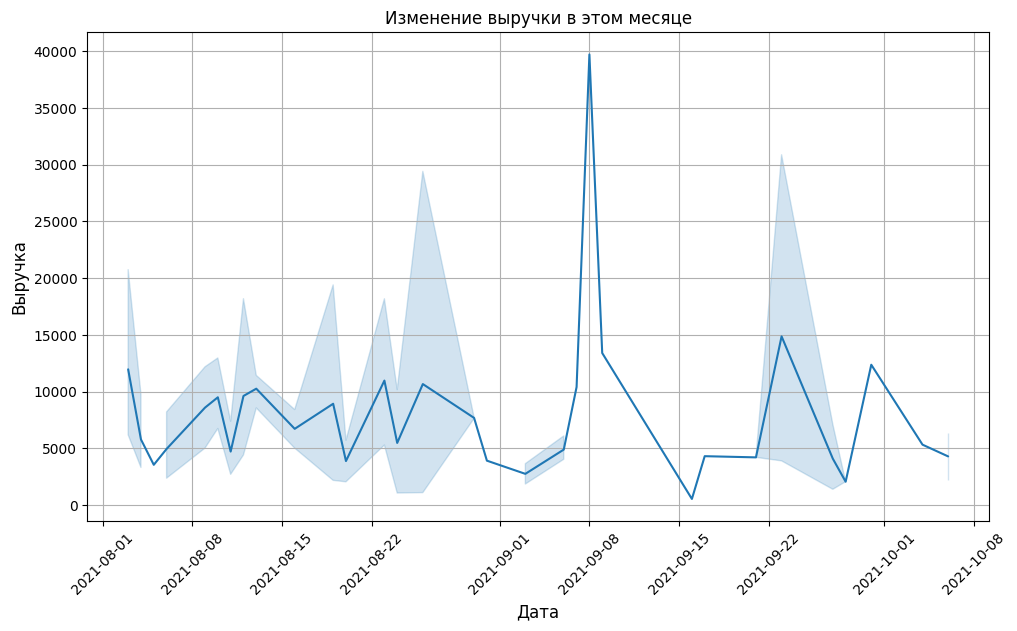

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.title('Изменение выручки в этом месяце')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_palette('Set1')
#sns.kdeplot(data=filtered_df["sum"], x = filtered_df["receiving_date"])
sns.lineplot(data=filtered_df, x=filtered_df["receiving_date"], y=filtered_df["sum"])

График описывает изменение полученной выручки по дате получения оригинала договора.

# Вопрос 3

Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?


In [13]:
september_df = dataframes[months.index("сентябрь 2021")]
september_df

,client_id,sum,status,sale,new/current,document,receiving_date
0,15.0,14288.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-10-08
1,16.0,1494.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-10-08
2,21.0,893.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-20
3,24.0,18142.7,ОПЛАЧЕНО,Андреев,текущая,NaN,2021-10-15
4,30.0,3833.7,В РАБОТЕ,Филимонова,текущая,NaN,NaT
...,...,...,...,...,...,...,...
104,304.0,1313.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-10-13
105,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-10-05
106,285.0,4328.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-10-05
107,286.0,4078.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-10-20


In [14]:
unique_last_names = september_df['sale'].unique()
unique_last_names

array(['Иванов', 'Кузнецова', 'Андреев', 'Филимонова', 'Смирнов',
       'Петрова', 'Васильев', 'Соколов', 'Михайлов'], dtype=object)

In [15]:
best_manager_dict = {} #Подсчет выручки
for name in unique_last_names:
    if name not in best_manager_dict:
        best_manager_dict[name] = september_df[september_df['sale'] == name]["sum"].sum()
best_manager_dict

{'Иванов': 94770.59999999998,
 'Кузнецова': 72228.4,
 'Андреев': 133652.5,
 'Филимонова': 59514.469999999994,
 'Смирнов': 221525.7000000001,
 'Петрова': 149344.46,
 'Васильев': 49895.45,
 'Соколов': 35183.5,
 'Михайлов': 4268.7}

In [16]:
summa = 0
sirname = ""
for key in best_manager_dict:
    if best_manager_dict[key] > summa:
        summa = best_manager_dict[key]
        sirname = key
print(f"Best manager in september 2021: {sirname}, with {summa} total revenue")

Best manager in september 2021: Смирнов, with 221525.7000000001 total revenue


# Вопрос 4

Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?


In [17]:
october_df = dataframes[months.index("октябрь 2021")]
october_df["new/current"].value_counts()

текущая    99
новая      36
Name: new/current, dtype: int64

Ответ: Преобладающим типом сделок в октябре 2021 были текущие.

# Вопрос 5
Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [18]:
june_df = dataframes[months.index("июнь 2021")]
june_df

,client_id,sum,status,sale,new/current,document,receiving_date
0,316.0,35653.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-08-09
1,15.0,13518.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-09
2,16.0,985.3,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-09
3,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-09-09
4,21.0,4233.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17
...,...,...,...,...,...,...,...
123,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22
124,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16
125,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08
126,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22


In [19]:
may_deals_filter = (june_df['receiving_date'].dt.month == 5)

In [20]:
originals_filter = (june_df['document'] == 'оригинал')

In [21]:
count_originals_in_may = len(june_df[may_deals_filter & originals_filter])

In [22]:
print("Оригиналов договора по майским сделкам было получено в июне 2021:", count_originals_in_may)

Оригиналов договора по майским сделкам было получено в июне 2021: 1


# Задание:

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов.

Вычислите остаток каждого из менеджеров на 1 июля 2021 года


In [23]:
# нужно просчитать два месяца: остаток с Мая на Июнь. С Июня на Июль

In [24]:
may_df = dataframes[months.index("май 2021")]
june_df = dataframes[months.index("июнь 2021")]
managers_df = pd.DataFrame()
merged_df = pd.concat([may_df, june_df], axis=0)
merged_df

,client_id,sum,status,sale,new/current,document,receiving_date
0,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT
1,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
2,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
3,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
...,...,...,...,...,...,...,...
123,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22
124,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16
125,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08
126,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22


In [25]:
unique_last_names = merged_df['sale'].unique()
unique_last_names = np.delete(unique_last_names, np.where(unique_last_names == "-"))
unique_last_names

array(['Петрова', 'Иванов', 'Кузнецова', 'Андреев', 'Филимонова',
       'Селиванов', 'Смирнов', 'Васильев', 'Соколов'], dtype=object)

In [26]:
managers_df["managers"] = unique_last_names
managers_df["bonus"] = [0] * len(unique_last_names)

In [27]:
managers_df

,managers,bonus
0,Петрова,0
1,Иванов,0
2,Кузнецова,0
3,Андреев,0
4,Филимонова,0
5,Селиванов,0
6,Смирнов,0
7,Васильев,0
8,Соколов,0


In [28]:
# Рассчет бонусов по заданным условиям и если оригиналы принесли после или во время июля 2021 года

for index, row in merged_df.iterrows():
    if row["new/current"] == "новая" and row["status"] == "ОПЛАЧЕНО" and row["document"] == "оригинал" and row['receiving_date'].month >= 7:
        manager_index = managers_df[managers_df["managers"] == row["sale"]].index[0]
        managers_df.at[manager_index, "bonus"] += row["sum"] * 0.07
    elif row["new/current"] == "текущая" and row["status"] != "ПРОСРОЧЕНО" and row["document"] == "оригинал" and row['receiving_date'].month >= 7:
        manager_index = managers_df[managers_df["managers"] == row["sale"]].index[0]
        if row["sum"] >= 10000:
            managers_df.at[manager_index, "bonus"] += row["sum"] * 0.05
        elif row["sum"] < 10000:
            managers_df.at[manager_index, "bonus"] += row["sum"] * 0.03

managers_df

,managers,bonus
0,Петрова,10770.7474
1,Иванов,5991.4520
2,Кузнецова,4496.9501
3,Андреев,3945.8297
4,Филимонова,2317.9579
5,Селиванов,5297.6900
6,Смирнов,6430.2650
7,Васильев,1037.0490
8,Соколов,269.2110
